# ASTR 425 Problem Set 2

Problem 1

Angular Size of star at distance r:

$\delta(r) = 2 arcsin(\frac{r_{star}}{2r})$

Small angle aproximation :

$arcsin(\frac{r_{star}}{r}) \approx 2(\frac{r_{star}}{r})$

Solid angle of star at distance r:

$\Omega(r) = \pi\delta^{2} \approx = 4\pi(\frac{r_{star}}{r})^{2}$

Total solid angle of stars:

$\Omega_{total} = \int_{0}^{R} 4\pi(\frac{r_{star}}{r})^{2}\rho r^{2}dr = 4\pi r_{star}^{2} \rho R$

Solve for R when solid angle equal 1 steradian:

$4\pi = 4\pi r_{star}^{2} \rho R \rightarrow R = (r_{star}^{2}\rho)^{-1}$

In [114]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [115]:
rho_s = 10e9/(3.086e22**3) #m^-3
r_s = 7e8 # m 

R = (rho_s*(r_s)**2)**-1/3.086e22 # Mpc
print R, 'Mpc'

1.94355020408e+17 Mpc


Problem 2

In [225]:
print 'Hubble underestimated the distance to Cepheids by a factor of approx:' ,(70.0/500.0)**-1.0

t_s = (3.086e22/500e3) #time in seconds
t_gyr = t_s/(365*24*3600*1e9) #time in Gyr
print 'The new age of the universe would therefore be: ', t_gyr, 'Gyr'

Hubble underestimated the distance to Cepheids by a factor of approx: 7.14285714286
The new age of the universe would therefore be:  1.95712836124 Gyr


To reconcile Hubble's incorrect constant with the actual age of the universe (at 13.7 Gyr), the universe would need to be accelerating. This is because the Hubble time (the inverse of Hubble's constant) assumes that the expansion is linear, so clearly if the incorrect measurement of $H_{0}$ shows the age of the universe to be only ~2 Gyrs, it would stand to reason that the recession speeds must have been far less earlier in the universes history.

Problem 3

From Ryden (3.9) the distance metric in a 3d flat space is:

$ds^{2} = dr^{2} + R^{2}sin^{2}(\frac{r}{R})d\theta^{2}$

Now since we are on a sphere of constant radius R, dr = 0, thus:

$ds^{2} =  R^{2}sin^{2}(\frac{r}{R})d\theta^{2}$

This can be re-written as:

$ds = Rsin(\frac{r}{R})d\theta$

$d\theta = \frac{ds}{Rsin(\frac{r}{R})}$

From this expression we can see what happens as $r \rightarrow \pi R$. If we assume to be standing at the north pole of the sphere, and an object is a distance r away it will be at an angle $\theta = \frac{r}{R}$. The minimum value of $d\theta$ would be when $r= \frac{\pi R}{2}$ (on the spheres equator). The value of $d\theta$ diverges however once $r= \pi R$ (at the north or south pole). Since between the poles of any sphere are inifinitely many geodesics the object would appear as if coming from all sides, whereas on the equator there should be only 1 geodesic.

Problem 4

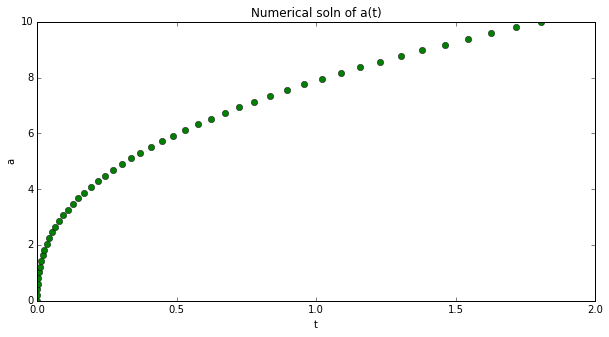

In [227]:
H_0 = 70 # km s^-1 Mpc^-1 

from scipy.integrate import quad
fcn = lambda a,H_0: (a**(3.0/2.0)/H_0)

def integrate(up_lim):
    return  quad(fcn,0.0,up_lim,args=(H_0,))

integrate = vectorize(integrate)
a = np.linspace(0,10)
t,err = integrate(a)
  
figure(figsize=(10,5))
plot(t,a,ls='',marker='o',c='g')
title('Numerical soln of a(t)')
xlabel('t')
ylabel('a')
show()

Algebraic solution of    $\dot{a}^{2} = H_{0}^{2}a^{-3}$

$(\frac{d}{dt}a)^{2} = H_{0}^{2}a^{-3}$

$\sqrt[2]{(\frac{d}{dt}a)^{2}} = \pm\sqrt[2]{H_{0}^{2}a^{-3}}$

$\frac{da}{dt} = \pm H_{0}a^{-3/2}$

$a^{3/2}da = \pm H_{0}dt$

$\int a^{3/2}da = \pm \int H_{0}dt$

$ \frac{2}{5} a^{\frac{2}{5}} = \pm H_{0}T + c$

$ a(t) = (\frac{5}{2}(c \pm H_{0}t))^{\frac{2}{5}}$

scale length must increase in an expanding universe thus (+) is the solution:
$ a(t) = (\frac{5}{2}(c + H_{0}t))^{\frac{2}{5}}$

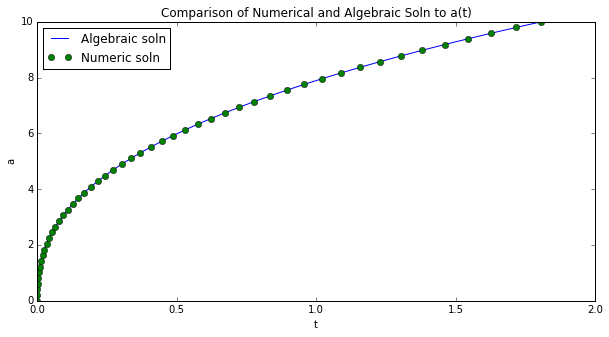

In [220]:
def soln(t,H_0):
    return ((5.0/2.0)*(H_0*t))**(2.0/5.0)

figure(figsize=(10,5))
plt.plot(t,soln(t,70),label = 'Algebraic soln')
plt.plot(result,a,ls='',marker='o',label = 'Numeric soln')
legend(loc=0)
title('Comparison of Numerical and Algebraic Soln to a(t)')
xlabel('t')
ylabel('a')
show()